<a href="https://colab.research.google.com/github/aleksperic/Basketball-player-stats/blob/master/Basketball_player_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_stats_by_season_full_details.csv')

In [3]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

columns:
*   League
*   Season
*   Stage - Internacional, NBA: Playoffs or Regular season
*   Player
*   Team
*   GP - Games Played
*   MIN - Minutes played
*   FGM - Field goals made
*   FGA - Field goals attempts
*   3PM - Three points made
*   3PA - Three points attemptsa
*   FTM - Free throws made
*   FTA - Free throws attempts
*   TOV - Turnovers
*   PF - Personal fouls
*   ORB - Offensive rebounds
*   DRB - Defensive rebounds
*   REB - Rebounds
*   AST - Assists
*   STL - Steals
*   BLK - Blocks
*   PTS - Points
*   birth_year
*   birth_month
*   birth_day
*   height
*   height_cm
*   weight
*   weight_kg
*   nationality
*   high_school



In [4]:
df.shape

(36950, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36950 entries, 0 to 36949
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       36950 non-null  object 
 1   Season       36950 non-null  object 
 2   Stage        36950 non-null  object 
 3   Player       36950 non-null  object 
 4   Team         36950 non-null  object 
 5   GP           36950 non-null  int64  
 6   MIN          36950 non-null  float64
 7   FGM          36950 non-null  int64  
 8   FGA          36950 non-null  int64  
 9   3PM          36950 non-null  int64  
 10  3PA          36950 non-null  int64  
 11  FTM          36950 non-null  int64  
 12  FTA          36950 non-null  int64  
 13  TOV          36950 non-null  int64  
 14  PF           36950 non-null  int64  
 15  ORB          36950 non-null  int64  
 16  DRB          36950 non-null  int64  
 17  REB          36950 non-null  int64  
 18  AST          36950 non-null  int64  
 19  STL 

In [6]:
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,351,756,840,271,171,105,518,623,231,112,84,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,387,593,773,261,119,71,483,554,651,125,77,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,243,534,702,252,181,107,266,373,501,142,82,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,121,536,586,149,208,80,540,620,218,70,79,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,301,439,541,233,187,78,313,391,365,113,20,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


In [7]:
df.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
count,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36774.000000,36912.000000,33919.000000,33919.000000
mean,31.401083,781.178506,117.838268,254.699648,30.616969,87.107876,57.238484,77.404980,49.160162,72.323978,35.362544,94.218106,129.580650,65.333424,27.635372,10.383735,323.544060,1987.492549,197.165827,209.275332,94.955836
std,16.112989,470.295971,91.730585,191.015086,30.658528,80.451297,53.446822,68.662186,34.383808,40.288340,35.028300,78.806687,109.112397,67.823130,20.710504,16.272083,248.591981,4.913384,8.630686,25.669331,11.643626
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968.000000,160.000000,130.000000,59.000000
25%,22.000000,476.000000,57.000000,131.000000,7.000000,25.000000,23.000000,32.000000,26.000000,44.000000,13.000000,44.000000,59.000000,24.000000,13.000000,1.000000,160.000000,1984.000000,191.000000,190.000000,86.000000
50%,31.000000,726.000000,99.000000,217.000000,23.000000,71.000000,44.000000,61.000000,43.000000,69.000000,25.000000,75.000000,102.000000,45.000000,23.000000,5.000000,275.000000,1988.000000,198.000000,207.000000,94.000000
75%,38.000000,983.200000,151.000000,323.000000,45.000000,126.000000,75.000000,102.000000,65.000000,93.000000,47.000000,120.000000,166.000000,84.000000,37.000000,13.000000,417.000000,1991.000000,203.000000,225.000000,102.000000
max,83.000000,3239.300000,857.000000,1941.000000,402.000000,1028.000000,756.000000,916.000000,464.000000,332.000000,440.000000,848.000000,1247.000000,907.000000,191.000000,269.000000,2818.000000,2002.000000,229.000000,375.000000,170.000000


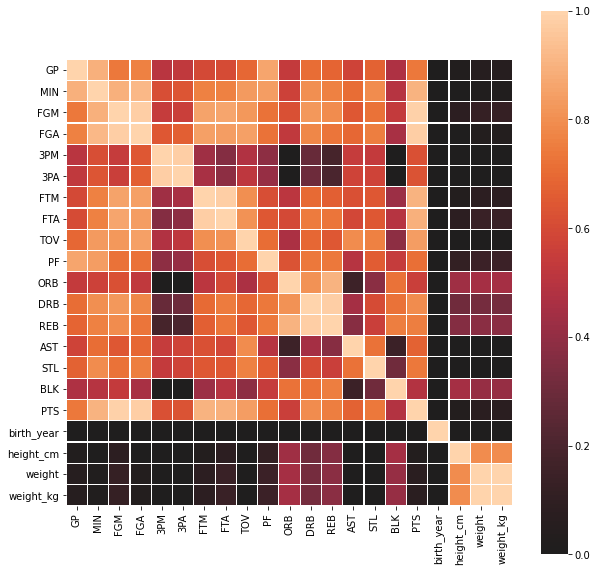

In [8]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmax = 1, vmin = 0, center = 0, square = True, linewidths = .2, xticklabels=True, yticklabels=True)
plt.show()

In [9]:
df['League'].unique()

array(['NBA', 'Euroleague', 'Israeli-BSL', 'Argentinian-Liga-A',
       'Australian-NBL', 'Austrian-A-Bundesliga', 'Balkan-BIBL',
       'Belarusian-BPL', 'Belgium-Scooore-League', 'Bosnian-BiH-Liga',
       'Brazilian-NBB', 'British-BBL', 'Bulgarian-NBL', 'Canadian-NBL',
       'Chinese-CBA', 'Croatian-A-1-Liga', 'Czech-NBL',
       'Danish-Basketligaen', 'Estonian-Latvian-Basketball-League',
       'Eurocup', 'FIBA-Europe-Cup', 'Finnish-Korisliiga',
       'French-Jeep-Elite', 'Georgian-Super-Liga', 'German-BBL',
       'Greek-HEBA-A1', 'Hungarian-NBIA', 'Italian-Lega-Basket-Serie-A',
       'Japanese-BLeague', 'Kosovo-FBK', 'Lebanese-Division-A',
       'Lithuanian-LKL', 'Luxembourg-Total-League',
       'Macedonian-Superleague', 'Mexican-LNBP', 'Netherlands-DBL',
       'New-Zealand-NBL', 'Norwegian-BLNO', 'Polish-TBL',
       'Romanian-Divizia-A', 'Serbian-KLS', 'Slovakian-Extraliga',
       'Slovenian-SKL', 'South-Korean-KBL', 'Spanish-ACB',
       'Swedish-Basketligan', 'Swiss-L

In [10]:
df['Stage'].unique()

array(['Regular_Season', 'Playoffs', 'International'], dtype=object)

In [11]:
df['Season'].unique()

array(['2009 - 2010', '2010 - 2011', '2011 - 2012', '2012 - 2013',
       '2013 - 2014', '2014 - 2015', '2015 - 2016', '2016 - 2017',
       '2017 - 2018', '2018 - 2019'], dtype=object)

In [12]:
# Funkcija koja nam iz dataframe-a izdvaja novi dataframe grupisam po ligama, sezonama i fazama (stage) ukoliko je NBA liga u pitanju
# Funkcija kao agrument prima naziv lige, i opciono sezonu i stage. Ukoliko argument sezona nije prosledjen,
# dobijamo dataframe u kome se nalaze podaci za sve sezone. Ukoliko argument stage nije prosledjen, 
# dobijamo dataframe po svim fazama takmicenja (regularne sezone i plejofa, vezano za NBA ligu)

def df_liga(liga, sezona=None, stage=None):
  if liga == 'NBA':
    if not stage:
      stage = input('Unesite koju fazu zelite ["Regular_Season", "Playoffs"] : ')
    if not sezona:
      return df[(df['League'] == liga) & (df['Stage'] == stage)].reset_index(drop=True)
    return df[(df['League'] == liga) & (df['Season'] == sezona) & (df['Stage'] == stage)].reset_index(drop=True)

  if not sezona:
    return df[(df['League'] == liga)].reset_index(drop=True)
  return df[(df['League'] == liga) & (df['Season'] == sezona)].reset_index(drop=True)
    


In [37]:
nba_regular = df_liga('NBA', stage='Regular_Season')

In [14]:
nba_regular_poslednja_sezona = df_liga('NBA', sezona='2018 - 2019', stage='Regular_Season')

In [15]:
nba_playoffs = df_liga('NBA', stage='Playoffs')

In [38]:
euroleague = df_liga('Euroleague')

In [17]:
euroleague_poslednja_sezona = df_liga('Euroleague', sezona='2018 - 2019')

In [18]:
eurocup = df_liga('Eurocup')

In [19]:
nba_regular.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,351,756,840,271,171,105,518,623,231,112,84,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,387,593,773,261,119,71,483,554,651,125,77,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,243,534,702,252,181,107,266,373,501,142,82,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,121,536,586,149,208,80,540,620,218,70,79,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,301,439,541,233,187,78,313,391,365,113,20,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


In [20]:
nba_playoffs.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Playoffs,Kobe Bryant,LAL,23,922.7,234,511,49,131,154,183,79,75,26,112,138,126,31,16,671,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School
1,NBA,2009 - 2010,Playoffs,Paul Pierce,BOS,24,929.8,147,336,40,102,117,142,64,80,20,123,143,82,24,14,451,1977.0,Oct,"Oct 13, 1977",6-7,201.0,235.0,107.0,United States,Inglewood High School
2,NBA,2009 - 2010,Playoffs,Pau Gasol,LAL,23,913.2,165,306,0,3,120,158,44,63,92,163,255,81,9,48,450,1980.0,Jul,"Jul 6, 1980",7-0,213.0,250.0,113.0,Spain,NaN
3,NBA,2009 - 2010,Playoffs,Ray Allen,BOS,24,925.0,131,304,56,145,69,80,36,74,12,68,80,63,22,3,387,1975.0,Jul,"Jul 20, 1975",6-5,196.0,205.0,93.0,United States,Hillcrest High School
4,NBA,2009 - 2010,Playoffs,Rajon Rondo,BOS,24,974.8,151,326,9,24,68,114,72,57,38,96,134,223,46,3,379,1986.0,Feb,"Feb 22, 1986",6-1,185.0,186.0,84.0,United States,Oak Hill Academy


In [21]:
euroleague.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,Euroleague,2009 - 2010,International,Linas Kleiza,OLY,22,668.3,132,275,30,86,83,104,36,45,40,103,143,28,15,4,377,1985.0,Jan,"Jan 3, 1985",6-8,203.0,234.0,106.0,Lithuania,Montrose Christian School
1,Euroleague,2009 - 2010,International,Qyntel Woods,PRO,19,598.2,121,257,29,89,47,62,63,50,18,105,123,45,20,9,318,1981.0,Feb,"Feb 16, 1981",6-8,203.0,221.0,100.0,United States,Carver High School
2,Euroleague,2009 - 2010,International,Josh Childress,OLY,20,647.0,115,220,19,58,55,85,40,39,27,69,96,37,23,12,304,1983.0,Jun,"Jun 20, 1983",6-8,203.0,210.0,95.0,United States,Mayfair High School
3,Euroleague,2009 - 2010,International,Trajan Langdon,CSKA,20,642.9,92,185,45,98,67,74,29,40,15,41,56,24,29,1,296,1976.0,May,"May 13, 1976",6-4,193.0,200.0,91.0,United States,East Anchorage High School
4,Euroleague,2009 - 2010,International,Mirza Teletovic,CAJ,20,601.4,98,218,58,133,42,57,27,43,18,71,89,23,10,4,296,1985.0,Sep,"Sep 17, 1985",6-9,206.0,242.0,110.0,Bosnia and Herzegovina,NaN


In [22]:
eurocup.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,Eurocup,2009 - 2010,International,Darius Washington,GAL,11,343.7,92,147,15,28,39,48,40,24,10,26,36,50,23,0,238,1985.0,Dec,"Dec 6, 1985",6-2,188.0,196.0,89.0,United States / North Macedonia,Edgewater High School
1,Eurocup,2009 - 2010,International,Radoslav Rancik,GAL,12,416.1,86,171,11,47,43,51,37,39,16,67,83,28,11,8,226,1979.0,Oct,"Oct 6, 1979",6-8,203.0,234.0,106.0,Slovakia,Park High School
2,Eurocup,2009 - 2010,International,Devin Smith,PANE,15,416.7,83,149,26,60,27,39,25,33,11,49,60,16,12,9,219,1983.0,Apr,"Apr 12, 1983",6-5,196.0,242.0,110.0,United States,William Penn High School
3,Eurocup,2009 - 2010,International,Marko Popovic,UNI,12,396.6,64,143,39,96,52,60,39,27,1,24,25,57,6,0,219,1982.0,Jun,"Jun 12, 1982",6-1,185.0,181.0,82.0,Croatia,NaN
4,Eurocup,2009 - 2010,International,Jaycee Carroll,GCN,14,397.2,80,189,27,78,24,25,29,27,13,35,48,31,9,2,211,1983.0,Apr,"Apr 16, 1983",6-2,188.0,170.0,77.0,United States / Azerbaijan,Evanston High School


In [23]:
nba_regular.shape

(2326, 31)

In [24]:
nba_playoffs.shape

(1466, 31)

In [25]:
euroleague.shape

(1566, 31)

In [26]:
eurocup.shape

(2327, 31)

In [27]:
nba_regular.rename(columns={'height_cm': 'NBA height_cm', 'weight_kg': 'NBA weight_kg', 'nationality': 'NBA nationality'}, inplace=True)
euroleague.rename(columns={'height_cm': 'Euroleague height_cm', 'weight_kg': 'Euroleague weight_kg', 'nationality': 'Euroleague nationality'}, inplace=True)

In [28]:
visina_igraca_nba_euroleague = pd.DataFrame([nba_regular['Player'], nba_regular['NBA height_cm'], euroleague['Player'], euroleague['Euroleague height_cm']]).transpose()
visina_igraca_nba_euroleague.head()

,Player,NBA height_cm,Player,Euroleague height_cm
0,Kevin Durant,206,Linas Kleiza,203
1,LeBron James,203,Qyntel Woods,203
2,Dwyane Wade,193,Josh Childress,203
3,Dirk Nowitzki,213,Trajan Langdon,193
4,Kobe Bryant,198,Mirza Teletovic,206


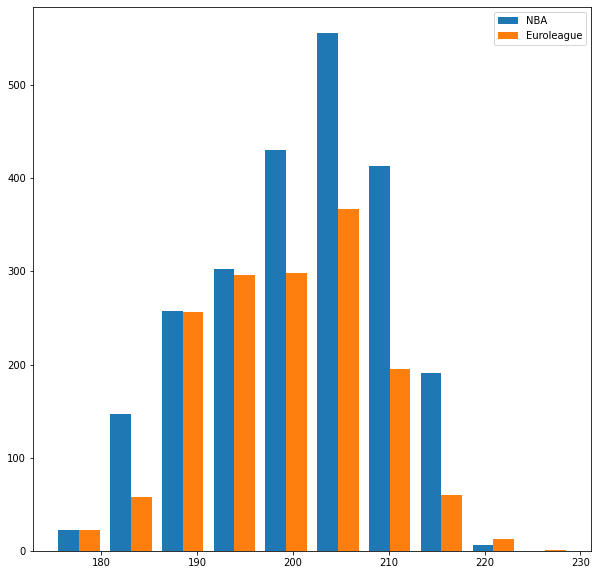

In [29]:
x = nba_regular['NBA height_cm'].to_numpy()
y = euroleague['Euroleague height_cm'].to_numpy()

plt.figure(figsize=(10,10))
plt.hist([x, y], label=['NBA', 'Euroleague'], bins=10)
plt.legend(loc='upper right')
plt.show()

In [30]:
tezina_igraca_nba_euroleague = pd.DataFrame([nba_regular['Player'], nba_regular['NBA weight_kg'], euroleague['Player'], euroleague['Euroleague weight_kg']]).transpose()
tezina_igraca_nba_euroleague.head()

,Player,NBA weight_kg,Player,Euroleague weight_kg
0,Kevin Durant,109,Linas Kleiza,106
1,LeBron James,113,Qyntel Woods,100
2,Dwyane Wade,100,Josh Childress,95
3,Dirk Nowitzki,111,Trajan Langdon,91
4,Kobe Bryant,96,Mirza Teletovic,110


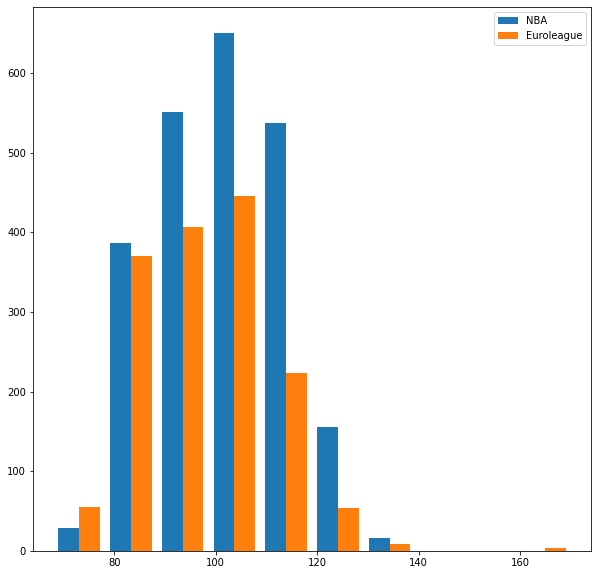

In [31]:
x = nba_regular['NBA weight_kg'].to_numpy()
y = euroleague['Euroleague weight_kg'].to_numpy()

plt.figure(figsize=(10,10))
plt.hist([x, y], label=['NBA', 'Euroleague'], bins=10)
plt.legend(loc='upper right')
plt.show()

In [32]:
df['nationality'].value_counts().head(10)

United States    12021
Serbia            1834
Croatia           1090
Lithuania          934
China              821
Argentina          793
France             745
Brazil             710
Spain              673
Slovenia           667
Name: nationality, dtype: int64

In [39]:
nba_regular['nationality'].value_counts().head(10)

United States    1768
France             51
Canada             42
Spain              32
Australia          21
Argentina          20
Brazil             17
Slovenia           16
Germany            16
Turkey             16
Name: nationality, dtype: int64

In [40]:
nba_regular_poslednja_sezona['nationality'].value_counts().head(10)

United States    217
Canada             7
Australia          4
France             4
Serbia             4
Spain              4
Germany            3
Croatia            3
Cameroon           3
Italy              2
Name: nationality, dtype: int64

In [41]:
nba_playoffs['nationality'].value_counts().loc['Serbia']

3

In [42]:
euroleague['nationality'].value_counts().head(10)

United States    377
Lithuania        114
Spain            108
Greece            97
Serbia            89
Croatia           70
France            63
Turkey            55
Russia            52
Italy             40
Name: nationality, dtype: int64

In [43]:
euroleague_poslednja_sezona['nationality'].value_counts().head(10)

United States    39
France           10
Serbia            9
Spain             8
Lithuania         6
Greece            6
Croatia           3
Germany           3
Latvia            3
Italy             3
Name: nationality, dtype: int64

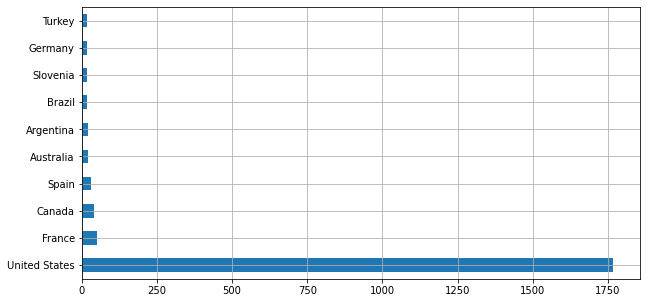

In [45]:
nba_regular['nationality'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.grid(True)
plt.show()

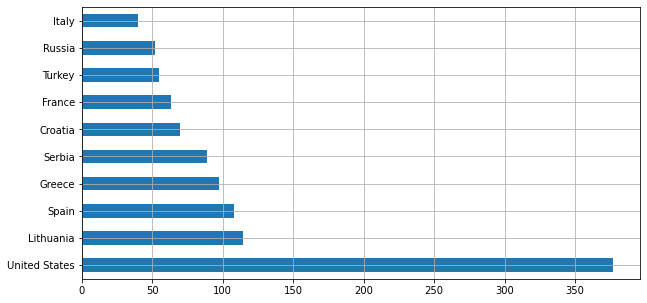

In [46]:
euroleague['nationality'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.grid(True)
plt.show()

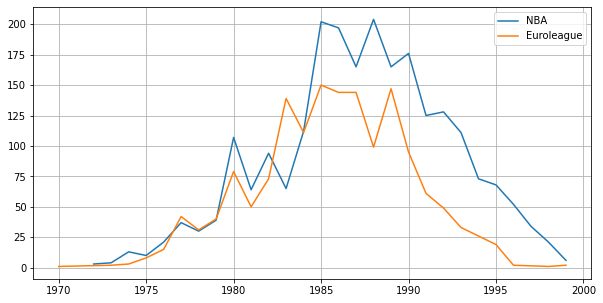

In [47]:
plt.figure(figsize=(10,5))
plt.plot(nba_regular['birth_year'].value_counts().sort_index(), label='NBA')
plt.plot(euroleague['birth_year'].value_counts().sort_index(),label='Euroleague')
plt.legend()
plt.grid(True)
plt.show()

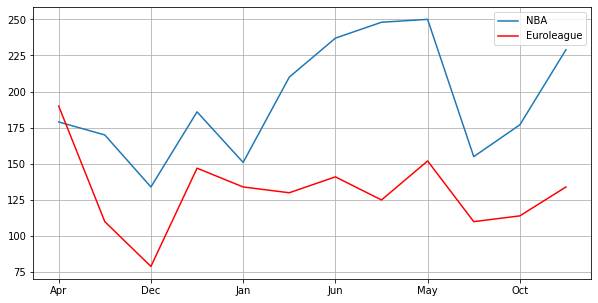

In [48]:
nba_regular['birth_month'].value_counts().sort_index().plot(kind='line', figsize=(10, 5), label='NBA')
euroleague['birth_month'].value_counts().sort_index().plot(kind='line', figsize=(10, 5), color='red', label="Euroleague")
plt.grid(True)
plt.legend()
plt.show()

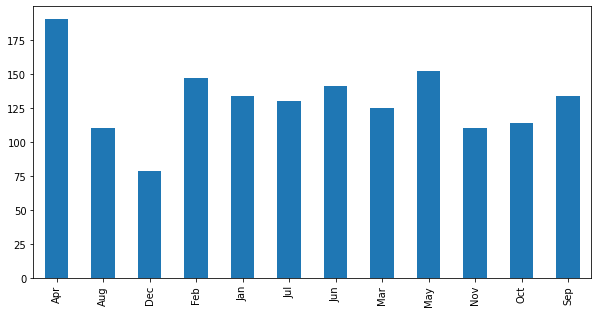

In [49]:
euroleague['birth_month'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.show()

In [50]:
# Grupisanje NBA po timovima i prosek njihovih numerickih vrednosti
nba_timovi_prosek = (nba_regular.groupby(['Team'])).mean()
nba_timovi_prosek

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
Team,,,,,,,,,,,,,,,,,,,,,
ATL,71.602410,1859.936145,306.759036,662.493976,68.385542,189.265060,134.048193,176.373494,112.120482,146.180723,74.445783,252.120482,326.566265,193.759036,63.433735,38.530120,815.951807,1986.385542,200.469880,220.963855,100.240964
BOS,69.666667,1794.954444,291.888889,635.466667,65.855556,183.133333,133.833333,169.133333,100.444444,149.877778,68.400000,240.866667,309.266667,179.222222,59.633333,31.866667,783.466667,1987.077778,199.344444,224.111111,101.711111
BRK,73.203390,1839.647458,291.881356,641.254237,70.322034,197.593220,137.084746,181.050847,106.440678,148.508475,80.711864,246.135593,326.847458,164.101695,55.779661,34.118644,791.169492,1988.033898,201.288136,223.406780,101.389831
CHA,73.238806,1927.502985,298.895522,673.552239,69.134328,195.776119,147.761194,189.223881,99.044776,135.373134,71.552239,255.447761,327.000000,185.119403,56.671642,38.477612,814.686567,1988.686567,199.761194,219.626866,99.656716
CHI,70.412500,1809.420000,279.987500,619.375000,50.662500,140.962500,131.437500,171.937500,96.800000,138.362500,91.337500,251.925000,343.262500,162.475000,52.050000,39.900000,742.075000,1986.725000,201.925000,225.537500,102.237500
CLE,69.632911,1810.910127,293.962025,635.468354,71.772152,192.734177,136.291139,181.582278,101.582278,142.443038,83.683544,248.645570,332.329114,167.012658,50.569620,30.000000,795.987342,1986.936709,201.873418,226.518987,102.822785
DAL,72.888889,1857.632099,294.962963,647.666667,69.925926,195.246914,132.950617,168.728395,96.839506,141.629630,72.222222,245.604938,317.827160,176.283951,58.419753,31.580247,792.802469,1984.506173,200.172840,219.876543,99.703704
DEN,73.681159,1964.228986,330.275362,699.971014,72.695652,202.144928,155.420290,206.666667,113.855072,163.159420,92.811594,265.840580,358.652174,205.188406,63.695652,39.347826,888.666667,1988.159420,200.463768,220.014493,99.739130
DET,73.402778,1940.277778,308.652778,684.083333,61.291667,175.277778,131.375000,186.236111,102.763889,156.138889,103.277778,266.472222,369.750000,162.277778,58.541667,35.166667,809.972222,1988.472222,201.430556,228.291667,103.527778


In [51]:
# Grupisanje evrolige po timovima i prosek njihovih numerickih vrednosti
euroleague_timovi = (euroleague.groupby(['Team'])).mean()
euroleague_timovi

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
Team,,,,,,,,,,,,,,,,,,,,,
BAY,19.000000,387.915625,55.375000,118.656250,15.281250,40.968750,26.312500,33.687500,21.437500,40.000000,17.531250,42.343750,59.875000,31.281250,11.593750,3.687500,152.343750,1987.687500,199.250000,218.625000,99.218750
BBB,18.909091,361.954545,50.090909,104.454545,11.818182,35.000000,25.181818,31.727273,23.636364,41.545455,14.454545,39.909091,54.363636,27.090909,10.181818,4.181818,137.000000,1982.000000,197.727273,219.272727,99.454545
BER,21.894737,462.189474,62.473684,133.631579,13.526316,36.684211,27.263158,36.157895,32.105263,52.263158,20.157895,48.052632,68.210526,35.631579,13.421053,4.052632,165.736842,1985.631579,198.263158,214.789474,97.473684
BES,20.200000,406.890000,48.100000,114.200000,14.600000,44.000000,22.000000,34.200000,27.600000,38.800000,17.000000,40.800000,57.800000,26.400000,11.000000,6.000000,132.800000,1984.400000,197.500000,214.100000,97.100000
BRO,20.187500,446.972917,62.145833,132.687500,18.729167,48.145833,31.375000,40.145833,26.645833,47.125000,14.770833,48.166667,62.937500,36.854167,11.312500,5.479167,174.270833,1986.729167,198.375000,214.833333,97.479167
BUD,16.461538,380.123077,51.769231,118.307692,15.461538,40.230769,19.461538,25.769231,21.000000,35.153846,13.538462,37.538462,51.076923,29.000000,12.307692,4.076923,138.461538,1987.923077,199.923077,212.307692,96.307692
CAJ,25.593750,579.993750,86.312500,183.312500,26.093750,70.468750,39.656250,51.609375,34.781250,53.703125,24.890625,66.656250,91.546875,51.062500,17.359375,7.953125,238.437500,1987.187500,199.265625,213.968750,97.062500
CAN,15.500000,356.137500,43.875000,101.875000,14.500000,39.000000,25.000000,30.500000,18.875000,38.875000,13.125000,37.500000,50.625000,28.750000,8.000000,3.875000,127.500000,1982.000000,198.500000,216.875000,98.375000
CED,16.615385,391.161538,57.692308,127.538462,16.461538,47.153846,23.846154,31.769231,26.846154,34.846154,14.615385,41.153846,55.769231,35.000000,11.076923,1.538462,155.692308,1988.846154,198.615385,207.615385,94.230769


In [ ]:
# Prosecna starost
# today = date.today()
# prosecna_startost = nba_timovi_prosek[nba_timovi_prosek['birth_year']]
# prosecna_startost
#prosecna_startost['prosecna starost igraca'] = (lambda x: today.year - prosecna_startost)

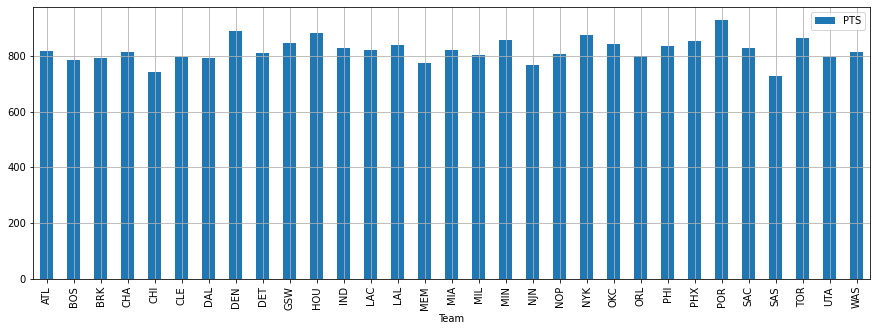

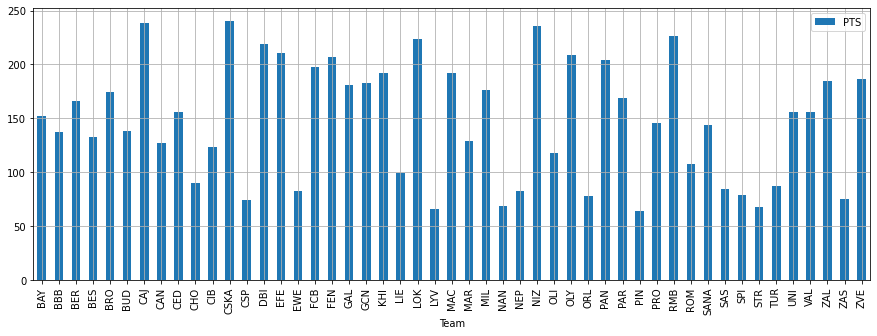

In [52]:
# Prikaz proseka odigranih utakmica u regularnom delu NBA lige po timovima
# Prema prikazanim podacima, mozemo zakljuciti da su timovi prilicno ujednaceni u odigranim utakmicama
nba_timovi_prosek.plot(kind='bar', y=['PTS'], figsize=(15,5), grid=True)
euroleague_timovi.plot(kind='bar', y=['PTS'], figsize=(15,5), grid=True)
plt.show()

In [53]:
nba_regular_poslednja_sezona.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2018 - 2019,Regular_Season,James Harden,HOU,78,2866.7,843,1909,378,1028,754,858,387,244,66,452,518,586,158,58,2818,1989.0,Aug,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2018 - 2019,Regular_Season,Paul George,OKC,77,2841.4,707,1614,292,757,453,540,205,214,105,523,628,318,170,34,2159,1990.0,May,"May 2, 1990",6-9,206.0,220.0,100.0,United States,Pete Knight High School
2,NBA,2018 - 2019,Regular_Season,Kemba Walker,CHA,82,2862.6,731,1684,260,731,380,450,211,131,52,309,361,484,102,34,2102,1990.0,May,"May 8, 1990",6-1,185.0,184.0,83.0,United States,Rice High School
3,NBA,2018 - 2019,Regular_Season,Bradley Beal,WAS,82,3027.8,764,1609,209,596,362,448,224,226,89,322,411,448,121,58,2099,1993.0,Jun,"Jun 28, 1993",6-3,191.0,207.0,94.0,United States,Chaminade College Preparatory School
4,NBA,2018 - 2019,Regular_Season,Damian Lillard,POR,80,2837.9,681,1533,237,643,468,513,212,148,68,303,371,551,88,34,2067,1990.0,Jul,"Jul 15, 1990",6-3,191.0,195.0,88.0,United States,Oakland High School


In [54]:
# Grupisanje dataframe-a po igracima
# Grupisanje dataframe-a po timovima
nba_igraci = nba_regular.groupby(['Player'], as_index=False)
nba_timovi = nba_regular.groupby(['Team'], as_index=False)
nba_igraci.mean()

,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
0,Aaron Brooks,75.250000,1813.725000,318.250000,757.250000,118.500000,303.500000,126.250000,151.750000,143.000000,156.750000,36.750000,110.750,147.500000,263.250000,50.00,12.750000,881.250000,1985.0,183.0,161.0,73.0
1,Aaron Gordon,73.500000,2175.725000,378.000000,838.750000,88.750000,274.500000,156.750000,222.000000,106.000000,152.000000,121.500000,364.250,485.750000,175.750000,60.00,49.000000,1001.500000,1995.0,206.0,220.0,100.0
2,Abdel Nader,54.500000,607.500000,70.500000,182.000000,27.500000,82.500000,25.000000,37.500000,30.000000,56.500000,13.500000,80.000,93.500000,23.000000,17.50,11.000000,193.500000,1993.0,198.0,225.0,102.0
3,Al Harrington,69.666667,1873.600000,358.000000,826.000000,119.333333,346.666667,148.333333,203.333333,116.666667,197.333333,78.666667,297.000,375.666667,99.666667,53.00,16.000000,983.666667,1980.0,206.0,245.0,111.0
4,Al Horford,74.750000,2462.212500,467.250000,889.750000,45.125000,121.750000,123.375000,160.750000,118.000000,158.375000,151.250000,457.125,608.375000,270.125000,60.75,89.875000,1103.000000,1986.0,208.0,245.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,Zach LaVine,74.000000,2122.033333,416.333333,923.666667,100.000000,268.000000,207.333333,251.666667,187.666667,163.666667,31.333333,214.000,245.333333,270.000000,61.00,17.666667,1140.000000,1995.0,196.0,208.0,94.0
651,Zach Lofton,1.000000,3.800000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.000000,1.00,0.000000,0.000000,1992.0,193.0,180.0,82.0
652,Zach Randolph,72.750000,2337.550000,495.000000,1039.000000,14.000000,53.125000,220.250000,289.000000,141.750000,170.875000,239.250000,483.750,723.000000,145.500000,56.25,20.000000,1224.250000,1981.0,206.0,260.0,118.0
653,Zaza Pachulia,71.375000,1353.125000,156.625000,322.500000,0.000000,2.125000,119.125000,157.375000,84.500000,166.500000,145.500000,266.625,412.125000,102.125000,49.75,23.875000,432.375000,1984.0,211.0,270.0,122.0


In [55]:
nba_regular.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


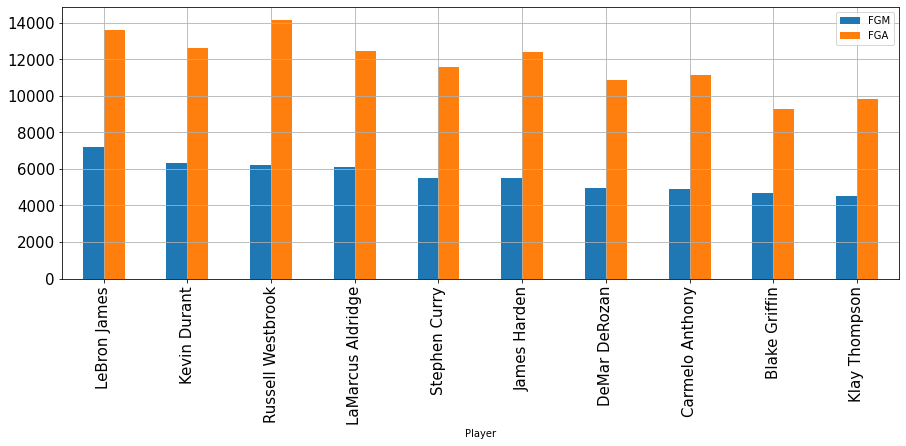

In [56]:
# Izdvajanje prvih 10 igraca sa najvise postignutih poena (FGM) sumiranih po svim sezonama, sortirani opadajuce 
# Njihov prikaz na grafiku (broj postignutih poena (FGM) u odnosu na broj pokusanih (FGA))
igraci_sa_najvise_poena = nba_igraci['Player', 'FGM', 'FGA'].sum().sort_values('FGM', ascending=False).head(10)
igraci_sa_najvise_poena.plot(x='Player', kind='bar', figsize=(15,5), grid=True, fontsize=15)
plt.show()

In [57]:
# Igrac sa najvise postignutih poena
igraci_sa_najvise_poena.iloc[0]

Player    LeBron James
FGM               7191
FGA              13602
Name: 393, dtype: object

In [58]:
# U dataset dodajemo kolonu '%' u prikazujemo procenat broj postignutih poena u odnosu na broj pokusanih izrazen u priocentima
igraci_sa_najvise_poena['%'] = round((igraci_sa_najvise_poena['FGM'] / igraci_sa_najvise_poena['FGA']) * 100, 2)
igraci_sa_najvise_poena.head(10).reset_index(drop=True)

,Player,FGM,FGA,%
0,LeBron James,7191,13602,52.87
1,Kevin Durant,6328,12636,50.08
2,Russell Westbrook,6190,14158,43.72
3,LaMarcus Aldridge,6125,12443,49.22
4,Stephen Curry,5504,11553,47.64
5,James Harden,5499,12411,44.31
6,DeMar DeRozan,4938,10855,45.49
7,Carmelo Anthony,4915,11147,44.09
8,Blake Griffin,4660,9281,50.21
9,Klay Thompson,4512,9823,45.93


In [59]:
# Sortiranje igraca koji imaju najbolji procenat suta u NBA ligi
igraci_sa_najvise_poena.sort_values('%', ascending=False).reset_index(drop=True)

,Player,FGM,FGA,%
0,LeBron James,7191,13602,52.87
1,Blake Griffin,4660,9281,50.21
2,Kevin Durant,6328,12636,50.08
3,LaMarcus Aldridge,6125,12443,49.22
4,Stephen Curry,5504,11553,47.64
5,Klay Thompson,4512,9823,45.93
6,DeMar DeRozan,4938,10855,45.49
7,James Harden,5499,12411,44.31
8,Carmelo Anthony,4915,11147,44.09
9,Russell Westbrook,6190,14158,43.72


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


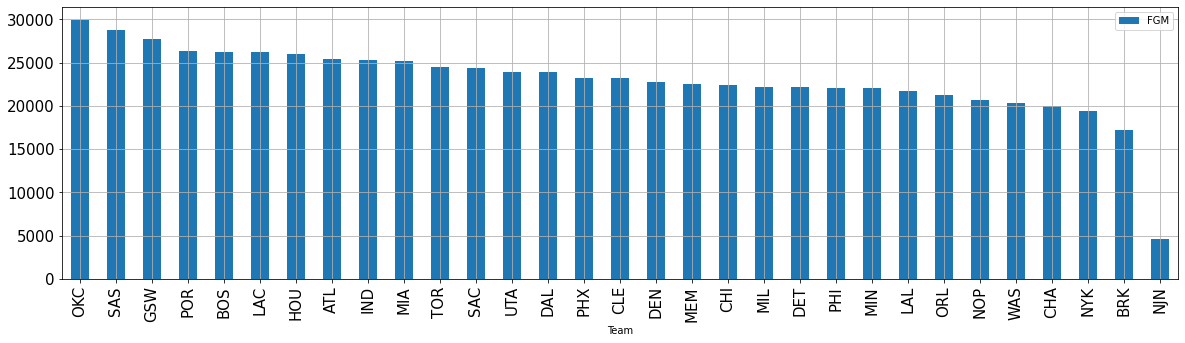

In [60]:
#Prikaz timova NBA lige koji su postigli najvise poena
timovi_sa_najvise_poena = nba_timovi['Team', 'FGM'].sum().sort_values('FGM', ascending=False)
timovi_sa_najvise_poena.plot(x='Team', kind='bar', figsize=(20,5), grid=True, fontsize=15)
plt.show()

In [61]:
# Funkcija koja nam vraca DataFrame igraca, ukupno odigranih utakmica, ukupno odigranih minuta, i prosek minuta po utakmici
# Ukoliko argument 'sezona' nije prosledjen, funkcija vraca rezultat za sve sezone
# Ukoliko zelimo da vidimo po odredjenoj sezoni, prosledjujemo argument u formatu npr. '2012 - 2013'

def minuti_utakmice_igraca(sezona=None):
  if sezona is None:
    nba_reg = df[(df['League'] == 'NBA') & (df['Stage'] == 'Regular_Season')]
  else:
    nba_reg = df[(df['League'] == 'NBA') & (df['Stage'] == 'Regular_Season') & (df['Season'] == sezona)]

  nba_igraci = nba_reg.groupby(['Player'], as_index=False)
  ukupno_minuta_utakmica = nba_igraci['GP', 'MIN'].sum().sort_values(by=['Player', 'GP', 'MIN']).reset_index(drop=True).set_index('Player')
  ukupno_minuta_utakmica['Prosek minuta'] = round(ukupno_minuta_utakmica['MIN'] / ukupno_minuta_utakmica['GP'], 2)
  ukupno_minuta_utakmica = ukupno_minuta_utakmica.sort_values('Prosek minuta', ascending=False)
  return ukupno_minuta_utakmica
  

In [62]:
# Ukupno odigranih utakmica, ukupno minuta i prosek minuta igraca NBA lige za sve sezone
minuti_utakmice_igraca()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


,GP,MIN,Prosek minuta
Player,,,
Kobe Bryant,291,10858.9,37.32
LeBron James,726,27093.6,37.32
Brandon Roy,65,2418.5,37.21
Kevin Durant,668,24738.6,37.03
Luol Deng,427,15704.8,36.78
...,...,...,...
Georges Niang,59,516.3,8.75
Sasha Vujacic,67,574.9,8.58
Cole Aldrich,62,531.0,8.56


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


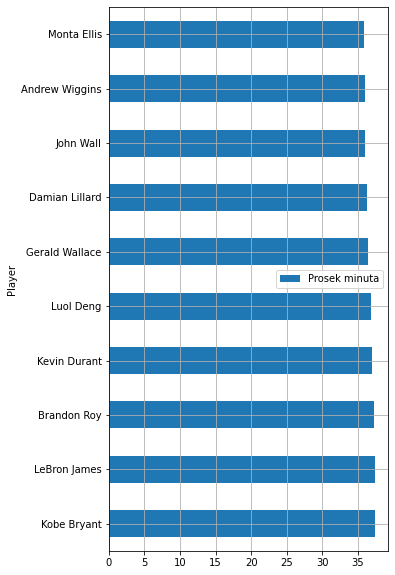

In [63]:
minuti_utakmice_igraca().head(10).plot(y='Prosek minuta', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

In [64]:
minuti_utakmice_igraca('2018 - 2019')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


,GP,MIN,Prosek minuta
Player,,,
Bradley Beal,82,3027.8,36.92
Paul George,77,2841.4,36.90
James Harden,78,2866.7,36.75
Russell Westbrook,73,2629.6,36.02
Jrue Holiday,67,2402.0,35.85
...,...,...,...
Georges Niang,59,516.3,8.75
Sindarius Thornwell,64,313.1,4.89
Zach Lofton,1,3.8,3.80


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


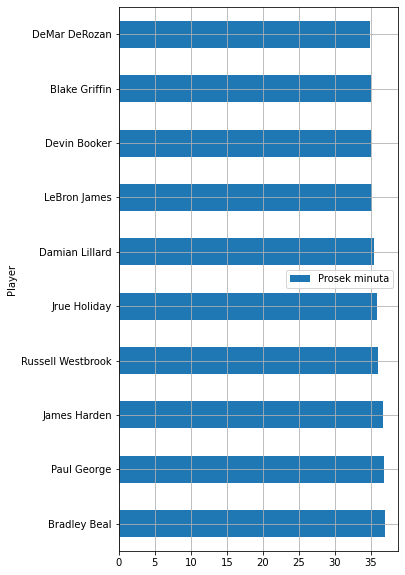

In [65]:
minuti_utakmice_igraca('2018 - 2019').head(10).plot(y='Prosek minuta', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

In [66]:
minuti_utakmice_igraca('2018 - 2019').loc['Nikola Jokic']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


GP                 80.0
MIN              2503.9
Prosek minuta      31.3
Name: Nikola Jokic, dtype: float64

In [67]:
# NBA timovi sa najboljim procentum suta za 3 poena, sortirani opadajuce
timovi_sa_najvise_trojki = nba_timovi['Team', '3PM', '3PA'].sum()
timovi_sa_najvise_trojki['%'] = round((timovi_sa_najvise_trojki['3PM'] / timovi_sa_najvise_trojki['3PA']) * 100, 2)
timovi_sa_najvise_trojki.sort_values('%', ascending=False).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Team,3PM,3PA,%
0,GSW,7443,18818,39.55
1,SAS,5996,15711,38.16
2,CLE,5670,15226,37.24
3,IND,5061,13769,36.76
4,LAC,5650,15373,36.75
5,WAS,4241,11608,36.54
6,SAC,4562,12510,36.47
7,MIA,5143,14167,36.30
8,NYK,4373,12082,36.19
9,HOU,7698,21290,36.16


In [70]:
# Funkcija ppg (Points per game) nam vraca DataFrame igraca, ukupno odigranih utakmica, ukupno postignutih poena, i prosek poena po utakmici
# Ukoliko argument 'sezona' nije prosledjen, funkcija vraca rezultat za sve sezone
# Ukoliko zelimo da vidimo po odredjenoj sezoni, prosledjujemo argument u formatu npr. '2012 - 2013'
def ppg(sezona=None):
  if sezona is None:
    nba_reg = df[(df['League'] == 'NBA') & (df['Stage'] == 'Regular_Season')]
  else:
    nba_reg = df[(df['League'] == 'NBA') & (df['Stage'] == 'Regular_Season') & (df['Season'] == sezona)]
  nba_igraci = nba_reg.groupby(['Player'], as_index=False)
  poeni_po_utakmici = nba_igraci['GP', 'PTS'].sum()
  poeni_po_utakmici['Prosecno poena'] = round(poeni_po_utakmici['PTS'] / poeni_po_utakmici['GP'], 2)
  return poeni_po_utakmici.sort_values('Prosecno poena', ascending=False).reset_index(drop=True)

In [71]:
# Ukupno odigranih utakmica, ukuprno poena, i prosek poena po svim sezonama
ppg()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


,Player,GP,PTS,Prosecno poena
0,Kevin Durant,668,18759,28.08
1,LeBron James,726,19550,26.93
2,Kobe Bryant,291,7797,26.79
3,Anthony Davis,335,8798,26.26
4,Joel Embiid,127,3206,25.24
...,...,...,...,...
650,Ronny Turiaf,65,121,1.86
651,Cole Aldrich,62,105,1.69
652,Ben Wallace,62,85,1.37
653,John Holland,1,0,0.00


In [72]:
# Ukupno odigranih utakmica, ukuprno poena, i prosek poena za poslednju '2018 - 2019' sezonu
ppg('2018 - 2019')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


,Player,GP,PTS,Prosecno poena
0,James Harden,78,2818,36.13
1,Paul George,77,2159,28.04
2,Giannis Antetokounmpo,72,1994,27.69
3,Joel Embiid,64,1761,27.52
4,LeBron James,55,1505,27.36
...,...,...,...,...
287,Dante Cunningham,64,194,3.03
288,Sindarius Thornwell,64,62,0.97
289,Tyler Ulis,1,0,0.00
290,John Holland,1,0,0.00
